# Keras API

## The Sequential model

### Description

A *Sequential* model creates a linear stack of layers where each layer has exactly one input tensor and one output tensor.

Upon adding a new layer to the stack, Keras can automatically infer its input shape from the output shape of the previous layer.

It is the easiest way to create simple neural networks architectures with Keras.

### Example: creating a fully connected neural network

A *fully connected* or *dense* neural network is an architecture where all the nodes (neurons) in one layer are connected to the neurons in the next layer.

#### Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Python version: 3.7.5


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [52]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import make_blobs

import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    Reshape,
    Dropout,
    BatchNormalization,
    Conv1D,
    Conv2D,
    Conv2DTranspose,
    MaxPooling2D,
    SimpleRNN,
    LSTM,
    GRU,
)

scikit-learn version: 0.22.1
TensorFlow version: 2.3.1
Keras version: 2.4.0


In [4]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy
    Takes a Keras History object as parameter"""

    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)
    plt.ylabel("Loss")
    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history["accuracy"]

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, ".--", label="Training acc")
    final_acc = acc[-1]
    title = "Training accuracy: {:.2f}%".format(final_acc * 100)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    if "val_accuracy" in history.history:
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, val_acc, "o-", label="Validation acc")
        final_val_acc = val_acc[-1]
        title += ", Validation accuracy: {:.2f}%".format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

#### Data generation

In [5]:
# Generate some data for training
# Each sample has 3 features and belongs to one of 2 classes
x_train, y_train = make_blobs(
    n_samples=1000, n_features=3, centers=2, cluster_std=2.0, random_state=11
)

#### Expected network architecture

![A simple neural network](images/neural_net2.jpeg)

#### Model creation

In [6]:
# Create a new sequential model
seq_model = Sequential()

# Add a 4-neurons layer using tanh as activation function
# Input shape corresponds the number of input features (here 3)
seq_model.add(Dense(4, activation='tanh', input_shape=(3,)))

# Add a 4-neurons layer using tanh
# Input shape is infered from previous layer
seq_model.add(Dense(4, activation='tanh'))

# Add a 1-neuron output layer using sigmoid
seq_model.add(Dense(1, activation='sigmoid'))

In [7]:
# Print a summary of model architecture
# (Can you justify the parameter counts for each layer?)
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


#### Model compilation

In [8]:
# Configuration of the training process
#   optimizer: gradient descent optimization method
#   loss: loss function
#   metrics: list of metrics monitored during training and testing
seq_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#### Model training

In [9]:
# Launch the training of the model on the data
#   epochs: number of epochs to train the model
#     An epoch is an iteration over the entire training dataset
#   batch_size: number of samples used for each gradient descent step
#     number of GD steps in an epoch = x_train.size / batch_size (rounded up)
#     total number of GD steps = epoch_GD_steps * epochs
#   verbose: level of information outputted during training
#     0 = silent, 1 = progress bar, 2 = one line per epoch
# The returned history object contains a record of loss and metrics values
history = seq_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.9490
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.9760
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.9840
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.9900
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.9940
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1923 - accuracy: 0.9950
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1526 - accuracy: 0.9950
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9960
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9970
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9970


#### Model evaluation

In [10]:
# Compute the loss & metrics values for the trained network
loss, acc = seq_model.evaluate(x_train, y_train, verbose=0)

print(f"Training loss: {loss:.05f}")
print(f"Training accuracy: {acc:.05f}")

Training loss: 0.06517
Training accuracy: 0.99700


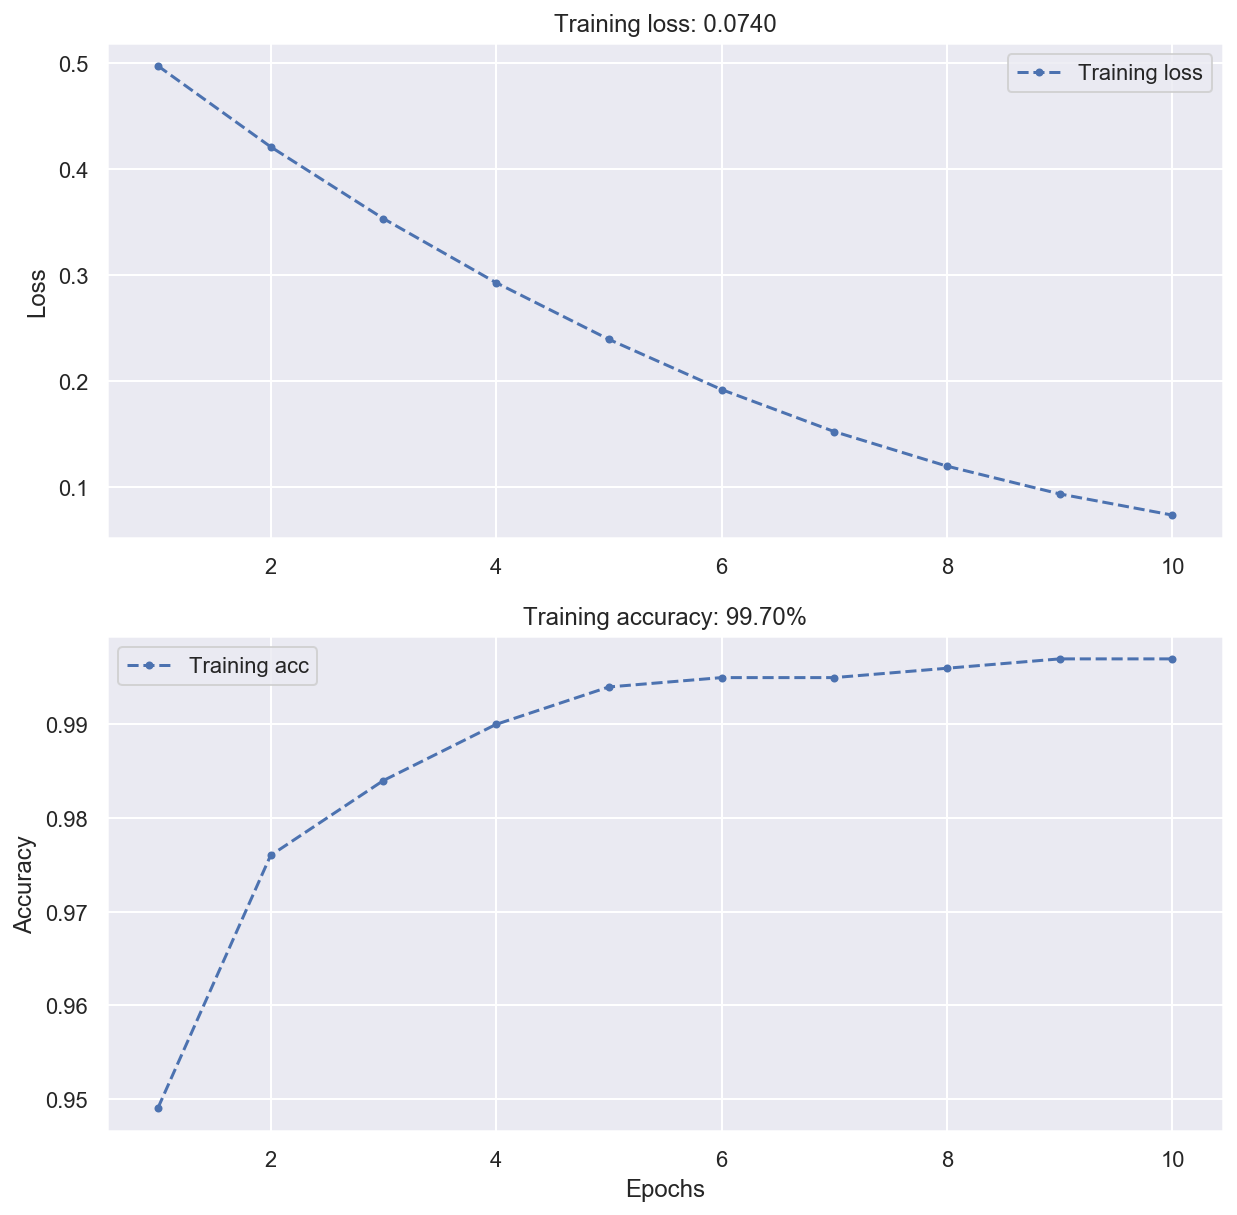

In [11]:
# Plot training metrics
plot_loss_acc(history)

## Layers API

### What is a layer?

Layers are the basic building blocks of neural networks in Keras.

A layer is a simple input-output transformation. It encapsulates a state (weights) and some computation.

Keras offers many layers for various purposes (convolution, pooling, normalization...). See the [official documentation](https://keras.io/api/layers/) for details.

### Core layers

#### Dense layer

Defines a fully connected layer. Implements a weighted sum of its inputs plus a bias.

- Input shape: *(batch_size, input_dim)*
- Output shape: *(batch_size, units)*

In [12]:
# units: number of neurons in the layer
# activation: activation function
dense_layer = Dense(units=3, activation='relu')

#### Flatten layer

Flattens its input without affecting the batch size. Often used before a *Dense* layer.

- Input shape: *(batch_size, input_dim1, input_dim2, ...)*
- Output shape: *(batch_size, product of input dimensions)*

In [20]:
# Create a 4D tensor
input = np.random.rand(32, 3, 3, 64).astype(np.float32)

# Flatten it into a 2D tensor
flatten_layer = Flatten()
output = flatten_layer(input)
# 576 = 3*3*64
print(f"Output: {output.shape}")

Output: (32, 576)


#### Reshape layer

Reshapes its input into a specified shape.

- Input shape: *(batch_size, input_dim1, input_dim2, ...)*
- Output shape: *(batch_size, target_shape)*

In [21]:
# Create a 2D tensor
input = np.random.rand(32, 3 * 3 * 64).astype(np.float32)

# Reshape it into a 4D tensor
reshape_layer = Reshape(target_shape=(3, 3, 64))
output = reshape_layer(input)
print(f"Output: {output.shape}")

Output: (32, 3, 3, 64)


#### Dropout layer

Applies Dropout to the input, randomly setting input units to 0 with a frequency of *rate* at each step during training time, which helps prevent overfitting.

Output shape is not modified.

- Input shape: *(batch_size, input_dim1, input_dim2, ...)*
- Output shape: *(batch_size, input_dim1, input_dim2, ...)*

In [ ]:
# rate: percentage of input units randomly set to 0 during training
dropout_layer = Dropout(rate=.2)

#### BatchNormalization layer

Applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1, as proposed in [this paper](https://arxiv.org/abs/1502.03167) by Ioffe and Szegedy (2015).

For an input $\pmb{x}^{(i)}$, the layer returns: 

$$\frac{\pmb{x}^{(i)} - \mu}{\sqrt{\sigma^2 + \epsilon}} * \gamma + \beta$$

- During training, the mean $\mu$ and the standard deviation $\sigma$ are computed on the current batch.
- During inference, $\mu$ and $\sigma$ are estimated using a moving average on the batches seen during training.
- $\gamma$ is a learned output scaling factor (initialized as 1).
- $\beta$ is a learned output offset factor (initialized as 0).
- $\epsilon$ is a small constant.


In [50]:
# Generate random data
input = np.random.rand(5, 3).astype(np.float32)
print(f'Mean: {np.mean(input)}. Std: {np.std(input)}')

# Apply batch normalization
bn_layer = BatchNormalization()
output = bn_layer(input, training=True)
print(f'Mean: {np.mean(output)}. Std: {np.std(output)}')

Mean: 0.5045558214187622. Std: 0.32485315203666687
Mean: -3.1789145538141383e-08. Std: 0.994976282119751


In [37]:
# Create a model with only a BN layer
model = Sequential([BatchNormalization(input_shape=(3,))])
# Each BN layer has 4 parameters per input
# output scale and offset are learned through backprop, and thus trainable
# mean and std deviation are estimated by a moving average during training
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 3)                 12        
Total params: 12
Trainable params: 6
Non-trainable params: 6
_________________________________________________________________


### Convolution layers

#### Conv1D layer

Creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.

- Input shape: *(batch size, time steps, features)*
- Output shape: *(batch_size, new time steps, filters)*. *new time steps* is typically lower than input *time steps*.

In [55]:
# The inputs are 128-length vectors with 10 timesteps, and the batch size is 4
inputs = np.random.random([4, 10, 128]).astype(np.float32)

# filters: number of output filters in the convolution
# kernel_size: length of the 1D convolution window
# activation: activation function
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
conv1d_layer = Conv1D(filters=32, kernel_size=3, activation="relu", padding="valid")
output = conv1d_layer(inputs)
# Input data has 10 timesteps. The 1D convolution with kernels of size 3 gives 8 new time steps
print(output.shape)  # (4, 8, 32)

(4, 8, 32)


#### Conv2D layer

Creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs, implementing spatial convolution over images.

- Input shape: *(batch_size, rows, cols, channels)*
- Output shape: *(batch_size, new_rows, new_cols, filters)*

In [ ]:
# filters: number of output filters in the convolution
# kernel_size: height and width of the 2D convolution window
# activation: activation function
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
conv2d_layer = Conv2D(
    filters=64, kernel_size=(3, 3), activation="relu", padding="valid"
)

#### Conv2DTranspose layer

Applies a transposed convolution operation (a.k.a. Deconvolution), generally used for upsampling.

- Input shape: *(batch_size, rows, cols, channels)*
- Output shape: *(batch_size, new_rows, new_cols, filters)*

[![Conv2DTranpose animation](images/conv2dtranspose.gif)](https://arxiv.org/abs/1603.07285v1)

In [87]:
# Create a 4D tensor
input = np.random.rand(32, 2, 2, 1).astype(np.float32)

# filters: number of output filters in the convolution
# kernel_size: height and width of the 2D convolution window
# strides: how much the input will be stretched
# activation: activation function
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
conv2dt_layer = Conv2DTranspose(
    filters=12, kernel_size=(3, 3), strides=2, padding="valid"
)
output = conv2dt_layer(input)
# 
print(f"Output: {output.shape}")

Output: (32, 5, 5, 12)


#### MaxPooling2D layer

Implements the Max pooling operation for 2D spatial data.

- Input shape: *(batch_size, rows, cols, channels)*
- Ouput shape: *(batch_size, pooled_rows, pooled_cols, channels)*

In [ ]:
# pool_size: window size over which to take the maximum
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
maxpool2d_layer = MaxPooling2D(pool_size=(2, 2), padding="valid")

### Recurrent layers

#### SimpleRNN layer

Fully connected RNN where  the output from previous timestep is to be fed as input at next timestep. Can output the values for the last time step (a single vector per sample), or the whole output sequence (one vector per timestep per sample).

- Input shape: *(batch size, time steps, features)*
- Output shape: 
  - *(batch size, units)* if attribute `return_sequences` is `False`.
  - *(batch size, time steps, units)* if attribute `return_sequences` is `True`.

In [ ]:
# Generate random data
inputs = np.random.random([32, 10, 8]).astype(np.float32)

# units: number of cells inside the layer
simplernn_layer = SimpleRNN(units=4)
output = simplernn_layer(inputs)
print(output.shape)  # (32, 4)

# return_sequences: whether to return the last output in the output sequence, or the full sequence.
simplernn_layer = SimpleRNN(units=4, return_sequences=True)
output = simplernn_layer(inputs)
print(output.shape)  # (32, 10, 4)

#### LSTM layer

Long Short-Term Memory layer. API is similar to `SimpleRNN`.

- Input shape: *(batch size, time steps, features)*
- Output shape: 
  - *(batch size, units)* if attribute `return_sequences` is `False`.
  - *(batch size, time steps, units)* if attribute `return_sequences` is `True`.

In [ ]:
# Generate random data
inputs = np.random.random([32, 10, 8]).astype(np.float32)

# units: number of cells inside the layer
lstm_layer = LSTM(units=4)
output = lstm_layer(inputs)
print(output.shape)  # (32, 4)

# return_sequences: whether to return the last output in the output sequence, or the full sequence.
lstm_layer = LSTM(units=4, return_sequences=True)
output = lstm_layer(inputs)
print(output.shape)  # (32, 10, 4)

#### GRU layer

Gated Recurrent Unit layer. API is similar to `SimpleRNN`.

- Input shape: *(batch size, time steps, features)*
- Output shape: 
  - *(batch size, units)* if attribute `return_sequences` is `False`.
  - *(batch size, time steps, units)* if attribute `return_sequences` is `True`.

In [ ]:
# Generate random data
inputs = np.random.random([32, 10, 8]).astype(np.float32)

# units: number of cells inside the layer
gru_layer = GRU(units=4)
output = gru_layer(inputs)
print(output.shape)  # (32, 4)

# return_sequences: whether to return the last output in the output sequence, or the full sequence.
gru_layer = GRU(units=4, return_sequences=True)
output = gru_layer(inputs)
print(output.shape)  # (32, 10, 4)